# Visualization with Python

## Index

1. Matplotlib
   - 1.1. Matplotlib basic plotting
          - 1.1.1. Lines
          - 1.1.2. Scatter plots
          - 1.1.3. Bar plots
   - 1.2. The object-oriented interface
   - 1.3. add_axes, add_subplot, sunplots
   - 1.4. Fill between
   - 1.5. Line properties
   - 1.6. Other attributes
          - 1.6.1. Histograms
          - 1.6.2. Legends
          - 1.6.3. Limtis
2. Seaborn
   - 2.1. Distribution plots
   - 2.2. Linear relationships
   - 2.3. Categorical data
   - 2.4. Other types (heatmap, clustermap)
3. Bokeh
4. Plotly
5. Vega
6. Additional references

## 1. `matplotlib`

### 1.1. Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

#### 1.1.1. Lines

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# es una magic que los plots me los pone en el notebook

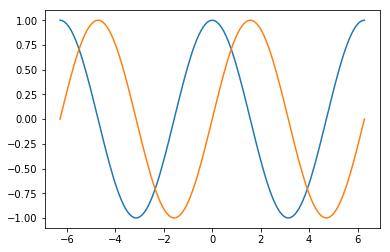

In [15]:
X = np.linspace(-2*np.pi, 2*np.pi, 150)
C, S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S)

# Vamos llamando a plt, con el método plot.

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


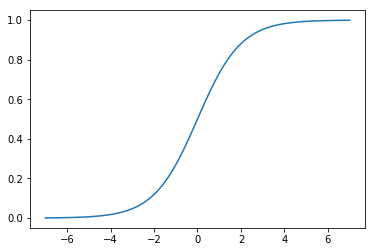

In [24]:
x2 = np.linspace(-7,7,100)

def logistic(x):
    return np.exp(x)/(1+np.exp(x))

plt.plot(x2,logistic(x2))

#### 1.1.2. Scatter plots

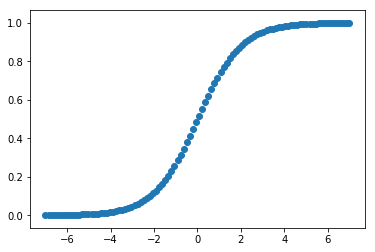

In [29]:
plt.scatter(x2,logistic(x2))

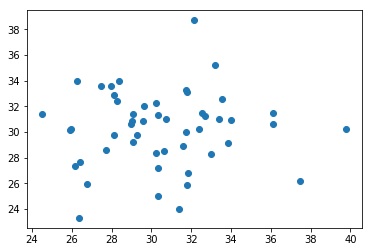

In [33]:
X = np.random.randn(50) * 3 + 30
Y = np.random.randn(50) * 3 +30

plt.scatter(X,Y)

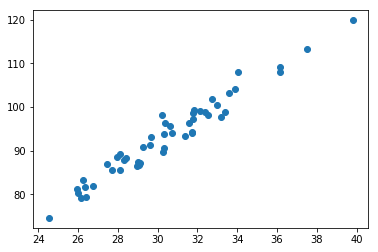

In [36]:
Y = 3 * X + 2

jitter = np.random.randn(50) *2

plt.scatter(X, Y + jitter)

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


This is what happens if you make a line plot of unsorted data:

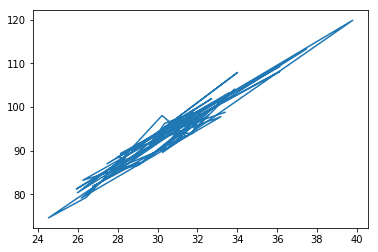

In [37]:
plt.plot(X, Y + jitter)

In [38]:
# Vemos que están desordenados

list(zip(X, Y + jitter))[:5]

[(26.341986803855548, 81.58266535104325),
 (34.01589546201701, 107.89877471850096),
 (25.980351197583435, 80.37353326358803),
 (37.48386799019829, 113.30290373164188),
 (30.344439077221313, 93.83890486486523)]

#### 1.1.3. Bar plots

Do not confuse with histograms

<BarContainer object of 4 artists>

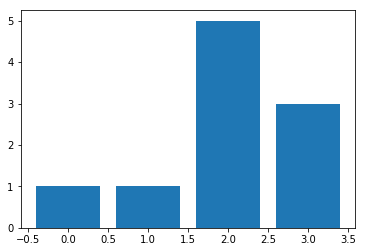

In [40]:
X = range(4)
Y = [1, 1, 5, 3]
plt.bar(X,Y)

([<matplotlib.axis.XTick at 0x7fcff89e7588>,
 <a list of 4 Text xticklabel objects>)

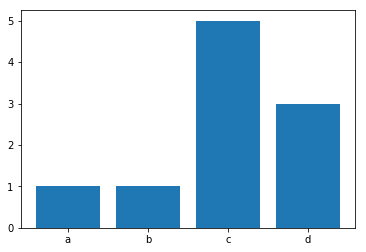

In [42]:
X = range(4)
Y = [1, 1, 5, 3]
plt.bar(X,Y)
plt.xticks(X, list('abcd'))  # Le digo las etiquetas del eje X

### 1.2. The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

AXES = PANEL. Así es menos lío.

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

Cuando trabajemos con datos haremos los mismos gráficos una y otra vez -> nos interesa tener funciones que grafiquen. Recomiendan esta estructura.

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

### 1.3.  `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

#### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

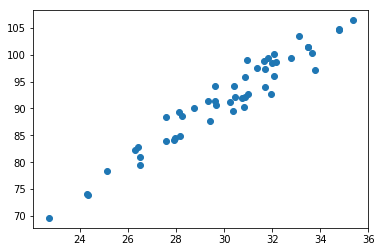

In [44]:
# Al usar esta interfaz, lo primero es siempre crear la figura.

X = np.random.randn(50) * 3 + 30
Y = 3 * X + 2 + np.random.randn(50) *2

plt.scatter(X, Y)

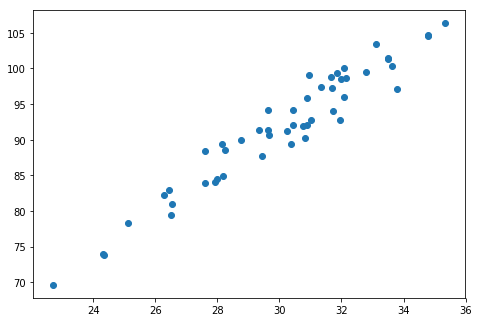

In [53]:
f = plt.figure()  # Creamos la figura

axes = f.add_axes([0,0,1,1])  # Le añadimos un panel. Le tenemos que especifiar la posición del panel.

# La posición se le pasa por coordenadas relativas [izq y abajo, anchura y altura]. Están en tanto por uno.

# No tienen que ver con los datos, sino con el espacio gráfico que voy a ocupar

axes.scatter(X,Y)

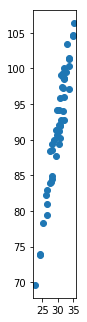

In [48]:
f = plt.figure()  

axes = f.add_axes([0,0,0.1,1])  

axes.scatter(X,Y)

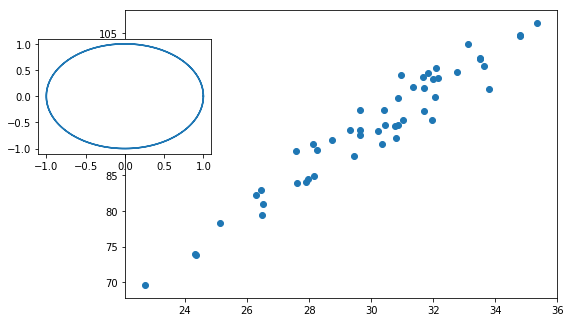

In [52]:
f = plt.figure() 

axes1 = f.add_axes([0.2,0,1,1]) 
axes1.scatter(X,Y)

axes2 = f.add_axes([0,0.5,.4,.4]) 
axes2.plot(C,S)

Esto no es demasiado común. Usaremos más los subplots.

#### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

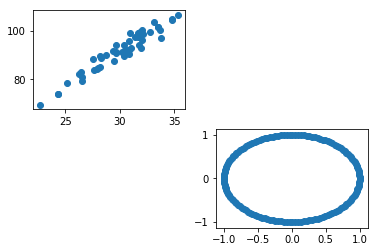

In [66]:
f = plt.figure()

axes1 = f.add_subplot(2,2,1)  # Un subplot en una rejilla de 2x2, y me cojo el primero
axes1.scatter(X,Y)

axes2 = f.add_subplot(2,2,4) # Me cojo el cuarto
axes2.scatter(C,S)

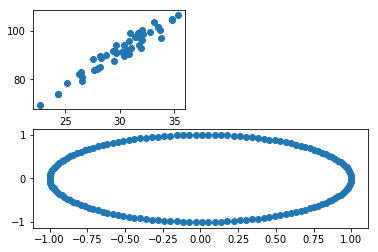

In [67]:
# No tienen por qué ser consistentes en sus dimensiones

f = plt.figure()

axes1 = f.add_subplot(2,2,1)  # Un subplot en una rejilla de 2x2, y me cojo el primero
axes1.scatter(X,Y)

axes2 = f.add_subplot(2,1,2) # Me cojo el cuarto
axes2.scatter(C,S)

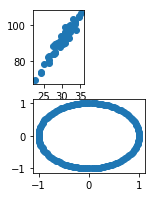

In [70]:

f = plt.figure()

axes1 = f.add_subplot(2,2,1) 
axes1.scatter(X,Y)

axes2 = f.add_subplot(2,1,2) 
axes2.scatter(C,S)

# Puedo manejar esto con los setters

f.set_size_inches(2,3)


#### `figure.subplots()`

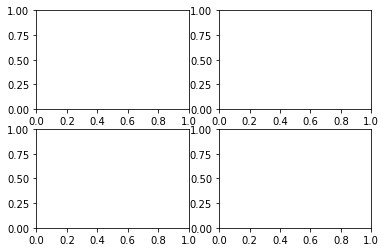

In [72]:
f, axeses = plt.subplots(2,2)

In [74]:
type(axeses)  # Es un array

numpy.ndarray

In [78]:
axeses[1:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcff7f62a20>,
      dtype=object)

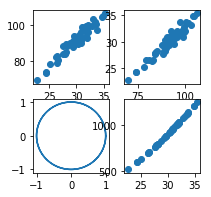

In [82]:
f, axeses = plt.subplots(2,2)

f.set_size_inches(3,3)

axeses[0,0].scatter(X,Y)
axeses[0,1].scatter(Y,X)
axeses[1,0].plot(C,S)
axeses[1,1].scatter(X, X**2)

f.savefig('ejemplo.png')  # La podemos guardar

f.savefig('ejemplo.pdf')

#### Sharing axis

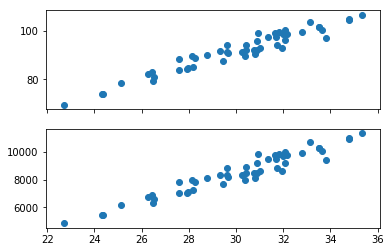

In [87]:
f, axeses = plt.subplots(2,1, sharex=True)

axeses[0].scatter(X,Y)
axeses[1].scatter(X, Y**2)

### 1.4. `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

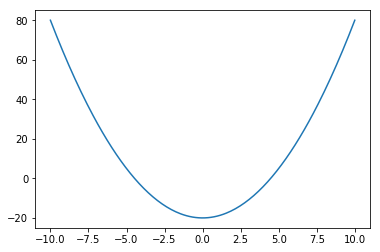

In [98]:
X2 = np.linspace(-10, 10, 200)
Y2 = X2**2 - 20
Y3 = X2**3


plt.plot(X2,Y2)

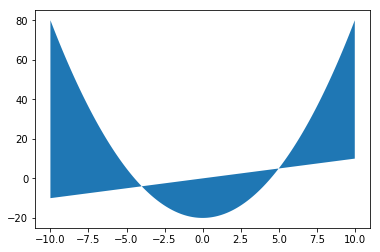

In [100]:
plt.fill_between(X2, X2, Y2) # En cada punto de X2, me va a pintar el espacio entre X2 y X2 y entre X2 e Y2

# X2 frente a X2 es la recta de pendiente unidad.

# Es como si fuera (X2, y = X2, y = Y2)

#### `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

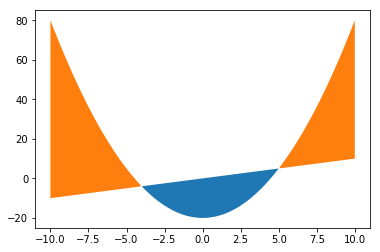

In [104]:
plt.fill_between(X2, X2, Y2, where= X2 > Y2)
plt.fill_between(X2, X2, Y2, where= X2 < Y2)

# Uno se pinta de un color y la otra de otra porque son llamadas sucesivas.
# Igual que como cuando llamamos dos veces a plot

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



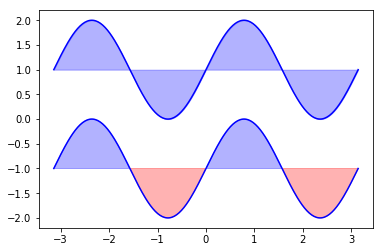

In [131]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X,np.ones(n),Y+1,color = 'blue', alpha = 0.3)
plt.fill_between(X,-np.ones(n),Y-1, where=((Y-1)>-1)&((Y-1)<0), color = 'blue', alpha = 0.3)
plt.fill_between(X,-np.ones(n),Y-1, where=((Y-1)<-1), color = 'red', alpha = 0.3)

plt.show()

# No haría falta el np.ones(n), con poner un '1'valdría (numpy hace broadcasting)

### 1.5. Line properties


#### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

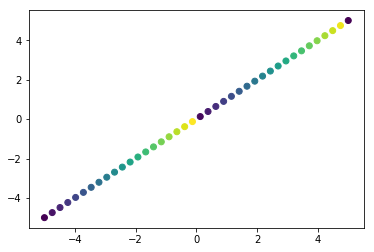

In [142]:
X = np.linspace(-5, 5, 40)

plt.scatter(X,X, c = X%5)

In [143]:
# Típicamente querremos representar una tercera variable.
# Recomendación: con colores sólo representar pertenencia a clase. Los humanos somos malos con los colores.

### Markers and linestyles

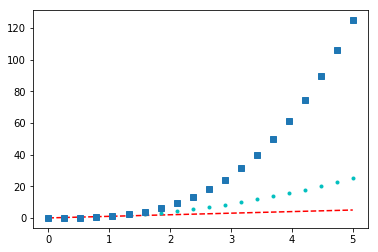

In [157]:
X = np.linspace(0,5,20)

Y1 = X
Y2 = X**2
Y3 = X**3

f, axes = plt.subplots(1,1)

axes.plot(X, Y1, 'r--')
axes.plot(X, Y2, 'c.')
axes.plot(X, Y3, 's')

?plt.plot  # Vemos todas las opciones que hay

### 1.6. Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

#### 1.6.1. Histograms

In [158]:
# Barplot: variables categóricas
# Histograma: variables continuas

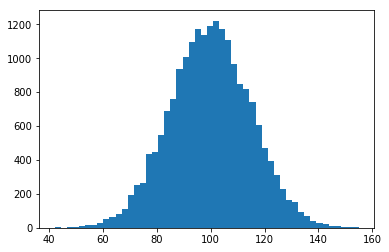

In [163]:
mu, sigma = 100, 15

iq = np.random.randn(20000)*15 + 100  # Esto es como la distribución del coef. intelectual 

plt.hist(iq, 50);  # 50 bins, el ; es para que no se imprima el array

Text(0.5,0,'IQ')

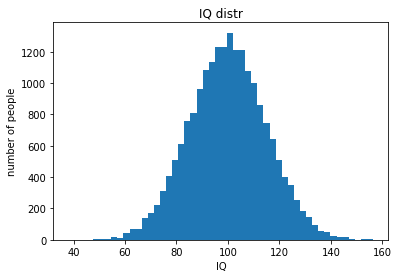

In [166]:
mu, sigma = 100, 15

iq = np.random.randn(20000)*15 + 100

plt.hist(iq, 50); 

# Títulos y etiquetas

plt.title('IQ distr')
plt.ylabel('number of people')
plt.xlabel('IQ')

#### Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.



Podemos usar Latex en el notebook

$$f(x) = e^x $$
$$f'(x) = \frac{1}{e^x} $$


Text(60,500,'tocoto')

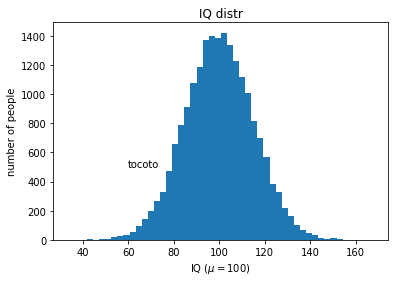

In [169]:
mu, sigma = 100, 15

iq = np.random.randn(20000)*15 + 100

plt.hist(iq, 50); 

# Títulos y etiquetas

plt.title('IQ distr')
plt.ylabel('number of people')
plt.xlabel('IQ ($\mu = 100$)')  # Con latex

# Texto en gráficos

plt.text(60,500, 'tocoto')  # Las coordenadas se fijan en el sistema de los DATOS, no en el gráfico de antes

#### 1.6.2. Legends

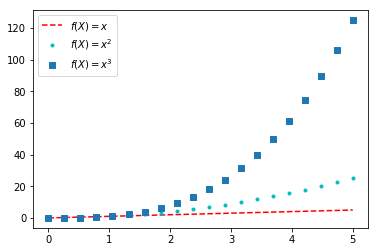

In [170]:
X = np.linspace(0,5,20)

Y1 = X
Y2 = X**2
Y3 = X**3

f, axes = plt.subplots(1,1)

axes.plot(X, Y1, 'r--', label = '$f(X) = x$')
axes.plot(X, Y2, 'c.', label = '$f(X) = x^2$')
axes.plot(X, Y3, 's', label = '$f(X) = x^3$')

# Tienen la label pero es interna, no se ve a no ser que yo la llame

plt.legend()

#### 1.6.3. Limits

(0, 5)

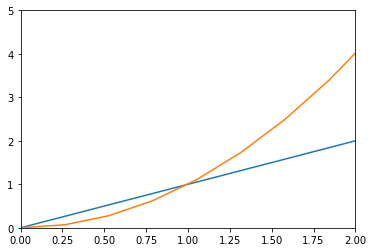

In [172]:
# Cómo especificar los límites de los ejes

f, ax = plt.subplots(1,1)
X = np.linspace(0,5,20)

Y1 = X
Y2 = X**2

plt.plot(X,Y1)
plt.plot(X,Y2)

# Con set_xlim

ax.set_xlim(0,2)
ax.set_ylim(0,5)

# Útil con outliers, para ignorarlos y que no me salga todo en pequeñito.

La interfaz de matplotlib es de bastante bajo nivel. Ante eso: seaborn

## 2. Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



### 2.1. Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

#### Scatter plots

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


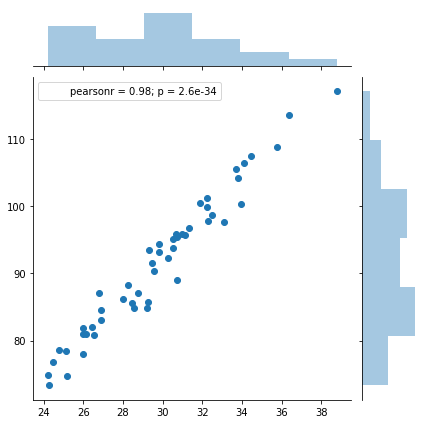

In [174]:
import seaborn as sns

X = np.random.randn(50) * 3 + 30
Y = 3 * X + 2 + np.random.randn(50) *2

sns.jointplot(X,Y)

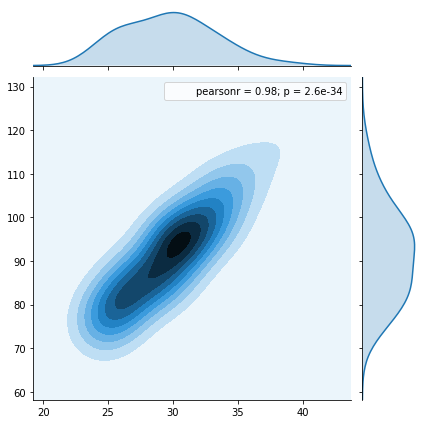

In [175]:
sns.jointplot(X,Y,kind = 'kde')

#### Histogram

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


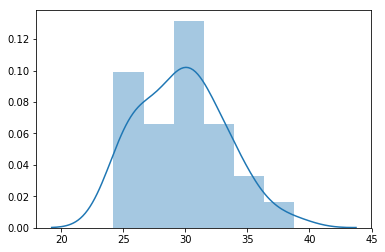

In [176]:
sns.distplot(X)

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

#### Pairwise relationships

In [181]:
houses = pd.read_csv('../Data/housing.csv')
houses.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2453,-119.55,36.52,31.0,1986.0,417.0,1042.0,422.0,3.0294,70200.0,INLAND
5106,-118.31,33.95,44.0,2490.0,430.0,1305.0,411.0,4.8295,149600.0,<1H OCEAN
7656,-118.26,33.82,28.0,5091.0,1074.0,4753.0,1033.0,3.6477,117400.0,<1H OCEAN
1290,-121.79,38.00,34.0,3090.0,593.0,1588.0,566.0,3.6118,124700.0,INLAND
14095,-117.10,32.75,11.0,2393.0,726.0,1905.0,711.0,1.3448,91300.0,NEAR OCEAN


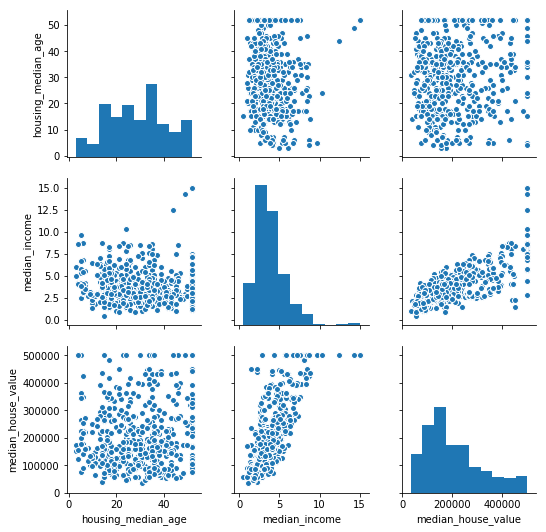

In [195]:
sns.pairplot(houses[['housing_median_age', 'median_income', 'median_house_value']].sample(500))

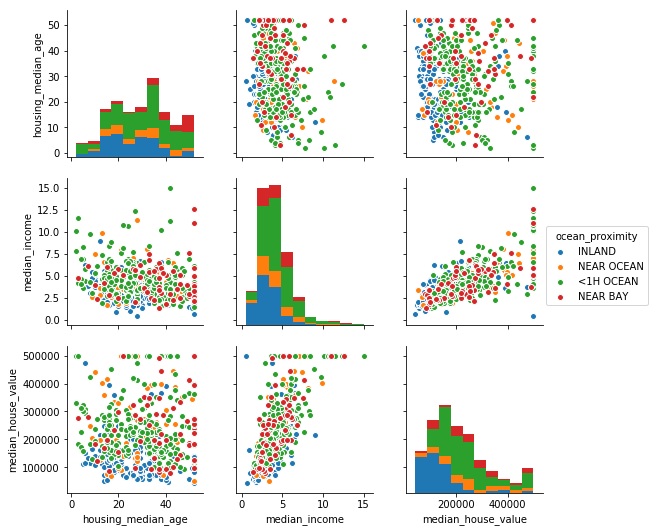

In [196]:
sns.pairplot(houses[['housing_median_age', 'median_income', 'median_house_value', 'ocean_proximity']].sample(500), hue = 'ocean_proximity')

### 2.2. Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

#### `lmplot()`

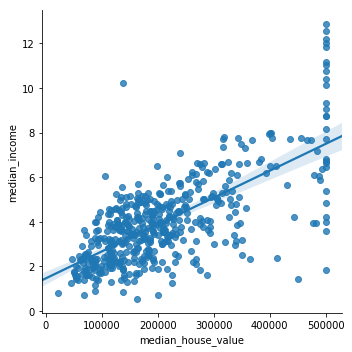

In [191]:
sns.lmplot(data=houses.sample(500), x = 'median_house_value', y = 'median_income')

# Muestra la recta de regresión y los intervalos de confianza

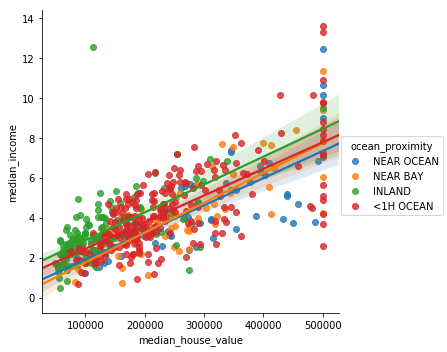

In [193]:
sns.lmplot(data=houses.sample(500), x = 'median_house_value', y = 'median_income', hue = 'ocean_proximity')

# Con hue le podemos pasar una variable categórica

### 2.3 Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

#### Swarm plot

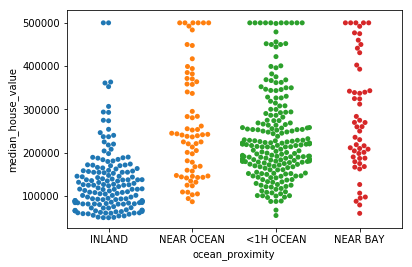

In [198]:
sns.swarmplot(data=houses.sample(500), x='ocean_proximity', y='median_house_value')

#### Boxplot

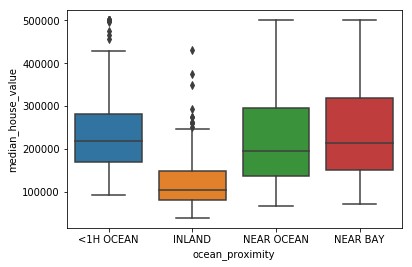

In [200]:
# Comparamos distribuciones de variables continuas en base a una variable categórica

sns.boxplot(data=houses.sample(500), x='ocean_proximity', y='median_house_value')

### 2.4. Other types

#### Heatmap

In [203]:
# Esto nos da la matriz de correlación

correlations = houses.corr()
correlations

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


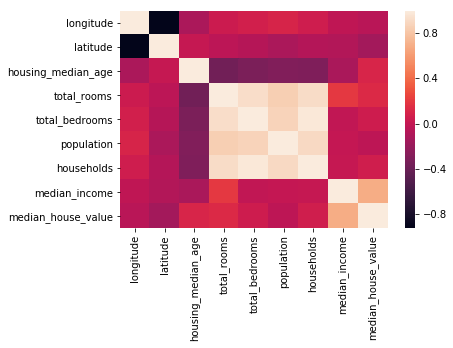

In [204]:
sns.heatmap(data = correlations)

#### Clustermap

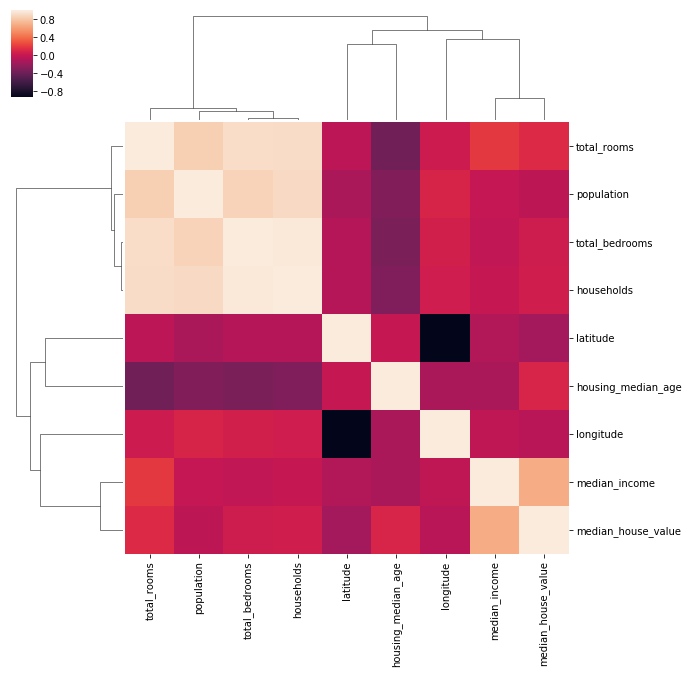

In [206]:
# Hace un clustering jerárquico

sns.clustermap(data = correlations)

El dendrograma nos dice que median_income y median_house_value son las más parecidas entre sí dos a dos. Longitude es la más similar a esas dos, y etc...

Seaborn tiene menos flexibilidad, pero al final trabaja con matplotlib. Nos dan la opción de hacer determinadas cosas mediante los dos últimos argumentos de cada función de seaborn (diag_kws, etc...). Nos permite pasarle diccionarios de configuraciones.

## 3. Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

Funciona sobre D3, que es una biblioteca de visualización interactiva pero funciona en javascript. Bokeh es una librería inspirada en D3 pero en python.

### 4. Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

Es una herramienta multilenguaje y es de pago aunque tiene bastantes usos gratuitos. Se puede usar desde python, R, etc.

#### Dash

"Shiny for Python" 


Shiny es una librería de R que nos permite crear dashboards. El equivalente en python es Dash. Para usos comerciales es caro, pero tiene algunas aplicaciones gratuitas.

### 5. See Also: Vega

http://vega.github.io/

Es una iniciativa para crear algo como plotly pero libre. Todavía no tiene mucha adopción. Está pensada como una biblioteca de intercambio de gramáticas de visualización.

## 6. Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

## 6. Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)